In [36]:
import pandas as pd

df= pd.read_csv ('./datasets/attacks.csv', encoding='unicode_escape')


# H0: There is not relation between incident and shark species 
# H1: A subset of shark species most often involved in indicents can be identified


#Check for duplicates in DF 
df[df.duplicated()== True].dropna()

## isolate Attacks and Dropna 
spattacks= df[['Fatal (Y/N)', 'Species ']].dropna()


## Need to clean spaces and odd characters from spattacks df 
spattacks['Species ']= spattacks['Species '].apply(lambda x: x.strip())
spattacks['better'] = spattacks['Species '].replace('[-]',' ', regex=True)
spattacks['better']=spattacks['better'].apply(lambda x: x.lower())

#Drop unused columns 
spattacks= spattacks.drop('Species ', axis=1)



# Extract only information on shark species 
spattacks['Species']= spattacks['better'].str.extract(r'(\w{3,}\sshark|\w{3,}\sshark|blue nose shark)')
spattacks= spattacks.dropna()

#Create list to drop Regex mismatchess 
droplist= ['female shark','the shark', 'nosed shark', 'from shark', 'two shark' , 'colored shark', 'metre shark', 'small shark', 'foot shark', 'captive shark', 'several shark', 'little shark', 'large shark', 'another shark', 'saw shark', 'same shark', '30kg shark', 'larger shark', 'young shark', 'juvenile shark', 'unidentified shark', 'finned shark', 'gaffed shark', 'for shark', 'hooked shark', 'ground shark', 'red shark']
spattacks2= spattacks[~spattacks['Species'].isin(droplist)]
spattacks2['Species'].unique()

#Drop unwanted column and reset index 
spattacks2.reset_index(drop= True, inplace= True)
spattacks2= spattacks2.drop('better', axis=1)
spattacks2['Species'].unique()

# Remove NON Y and N entries from Y/N
def condition(x): 
    if x == 'Y': 
        return x
    elif x == 'N': 
        return x
# Create new column with only Y or N
spattacks2['Fatal?']= spattacks2['Fatal (Y/N)'].apply(condition)
spattacks2= spattacks2.drop('Fatal (Y/N)', axis=1)
spattacks2= spattacks2.dropna()
spattacks2.reset_index(drop= True, inplace= True)


# Correct misspelled categories 
spattacks2['Species'].replace('zambezi shark', 'zambesi shark', inplace= True)
spattacks2['Species'].replace('tipped shark', 'blacktip shark', inplace= True)
spattacks2['Species'].replace('gill shark', 'sevengill shark', inplace= True)
spattacks2['Species'].replace('carcharinid shark', 'carcharhinid shark', inplace= True)
spattacks2['Species'].replace('gray shark', 'grey shark', inplace= True)
spattacks2['Species'].replace('jackson shark', 'port jackson shark', inplace= True)
spattacks2['Species'].replace('brown shark', 'sandbar shark', inplace= True)
spattacks2['Species'].replace('copper shark', 'whaler shark', inplace= True)
spattacks2['Species'].replace('white shark', 'great white shark', inplace= True)
spattacks2['Species'].replace('blacktip shark', 'reef shark', inplace= True)
spattacks2['Species'].replace('blacktip shark', 'reef shark', inplace= True)
spattacks2['Species'].replace('whitetip shark', 'reef shark', inplace= True)


spattacks2.reset_index(drop= True, inplace= True)
spattacks2['Species']= spattacks2['Species'].apply(lambda x: x.title())
spattacks2


## TABLE NOW CLEANED 
#Group by species number of attacks (both fatal and non)
Attacks= spattacks2.groupby(['Species']).count()
Attacks


#Fatal incidents vs nonfatal 
Proportion_Fatal= spattacks2.groupby([spattacks2['Fatal?']== 'Y']).count()

#Group by fatalities 
fatalities= spattacks2[spattacks2['Fatal?']== 'Y']
fatal_species_counts= fatalities.groupby(['Species']).count()

#Non Fatal incidents 
nonfatal= spattacks2[spattacks2['Fatal?']== 'N']
nonfatal_species_counts= nonfatal.groupby(['Species']).count()


In [38]:

### Creating Frequency Table 

total_incidents= len(spattacks2['Fatal?'])
Attacks

## playin around 
spattacks2['Species'].value_counts()
my_tab = pd.crosstab(index=spattacks2["Species"],columns=['count'] ) 
my_tab= my_tab.sort_values(by= ['count'], ascending = False)
my_tab['index']= range(1, len(my_tab)+1)
my_tab

# Make a Group of "Other" with incidents under a certain percentage 
# First, frequency table
#Percentage 
 
# Make column of species counts frequency 
Frequency = (spattacks2['Species'].value_counts()/spattacks2['Species'].count())*100
Count= spattacks2['Species'].value_counts()

#Frequency Table 

#pd.DataFrame(index= spattacks2['Species'])
Frequency = pd.DataFrame(Frequency)
Frequency= Frequency.rename({'Species':'Frequency'}, axis=1)
Frequency['Frequency']=Frequency['Frequency'].apply(lambda x: round(x,2))


Count= pd.DataFrame(Count)
Count=Count.rename({'Species':'Count'}, axis=1)

Frequency_Table= pd.merge(Count, Frequency, left_index=True, right_index=True)
sub= Frequency_Table.iloc[18:,:]
sub['Count'].sum()
## From row 18 down represents less than 5% of shark attacks 

Frequency_Table.iloc[:17]
sub['Frequency'].sum()

#count= 89, frequency= 4.74 , name = "Others"
Frequency_Table= Frequency_Table.iloc[:17]
Frequency_Table
row = pd.Series({'Count':89,'Frequency':4.74},name='Other')
Frequency_Table = Frequency_Table.append(row)

#index= list(Frequency_Table.index)


#Frequency_Table.insert(0, 'Index', index)
#Frequency_Table_Acess
Frequency_Table['Count']=Frequency_Table['Count'].apply(lambda x: int(x))
#Frequency_Table['Frequency']= Frequency_Table['Frequency'].apply(lambda x: x.round(decimals= 2))

#!pip install dataframe_image
import pandas as pd
import numpy as np
import dataframe_image as dfi


df_styled = Frequency_Table.style.background_gradient().set_precision(2)
#dfi.export(df_styled,"SharkFrequency.png")


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Count,Frequency
Great White Shark,620,33.32
Tiger Shark,256,13.76
Bull Shark,176,9.46
Reef Shark,152,8.17
Nurse Shark,95,5.10
Whaler Shark,70,3.76
Mako Shark,53,2.85
Wobbegong Shark,44,2.36
Hammerhead Shark,44,2.36
Spinner Shark,44,2.36


Text(0.5, 0, 'Incidents Recorded')

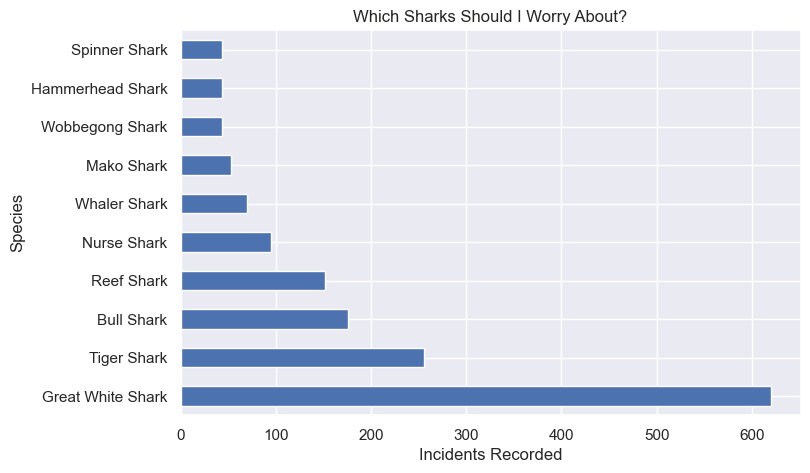

In [33]:
## Graphing for visual Reference ##

import seaborn as sns 
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1)

sns.set_style("darkgrid")

top10= pd.DataFrame(Frequency_Table.iloc[:10])
sns.set(rc={"figure.figsize": (12,4)})
top10['Count'].plot(kind="barh", stacked= True)
plt.title("Which Sharks Should I Worry About?")
plt.ylabel("Species")
plt.xlabel("Incidents Recorded")


In [32]:
## CREATE FvN DF for Stacked barplot 
#Group by species number of attacks (both fatal and non)


Attacks= spattacks2.groupby(['Species']).count()
Attacks


#Fatal incidents vs nonfatal 
Proportion_Fatal= spattacks2.groupby([spattacks2['Fatal?']== 'Y']).count()

#Group by fatalities 
fatalities= spattacks2[spattacks2['Fatal?']== 'Y']
fatal_species_counts= fatalities.groupby(['Species']).count()

#Non Fatal incidents 
nonfatal= spattacks2[spattacks2['Fatal?']== 'N']
nonfatal_species_counts= nonfatal.groupby(['Species']).count()


nonfatal_species_counts.rename(columns={'Fatal?': 'NonFatal Attacks'}, inplace=True)
nonfatal_species_counts
fatal_species_counts.rename(columns= {'Fatal?': 'Fatal Attacks'}, inplace= True)
fatal_species_counts

FvsN= nonfatal_species_counts.merge(right= fatal_species_counts, how= 'outer', left_index=True, right_index=True )
FvsN= FvsN.fillna(0)
FvsN['Fatal Attacks']= FvsN['Fatal Attacks'].apply(lambda x: int(x))
FvsN['Total Attacks']= FvsN.apply(np.sum, axis=1)
FvsN= FvsN.sort_values(by= 'Total Attacks', ascending= False)
FvsN10= FvsN.iloc[:10]
FvsN10_styled = FvsN10.style.background_gradient()
FvsN10_styled


,NonFatal Attacks,Fatal Attacks,Total Attacks
Species,,,
Great White Shark,477,143,620
Tiger Shark,186,70,256
Bull Shark,138,38,176
Reef Shark,144,8,152
Nurse Shark,94,1,95
Whaler Shark,65,5,70
Mako Shark,51,2,53
Wobbegong Shark,44,0,44
Spinner Shark,44,0,44


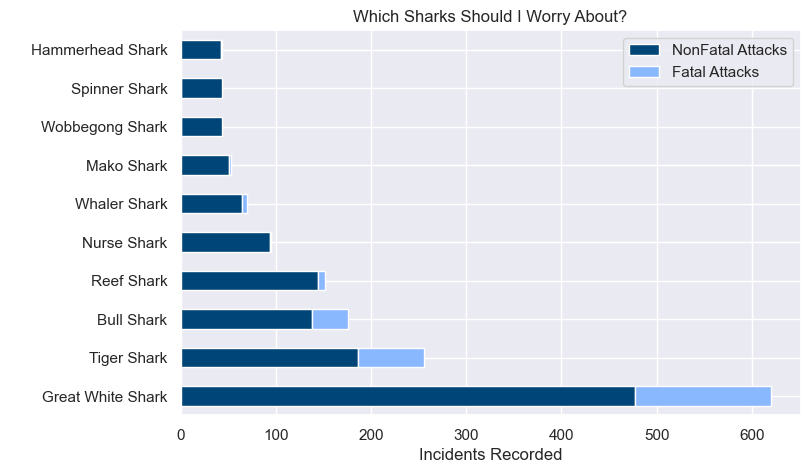

In [124]:
#Create Stacked Barplot

fig, ax= plt.subplots(1)
plt.rcParams["figure.figsize"] = (8,6)
FvN10plot= FvsN10[['NonFatal Attacks', 'Fatal Attacks']].plot(kind='barh', stacked=True, ax=ax, color= {'xkcd:prussian blue', 'xkcd:carolina blue'} )
plt.title("Which Sharks Should I Worry About?")
plt.ylabel(' ')
plt.xlabel("Incidents Recorded")

plt.savefig('FvsNStackedBar.png',bbox_inches="tight")



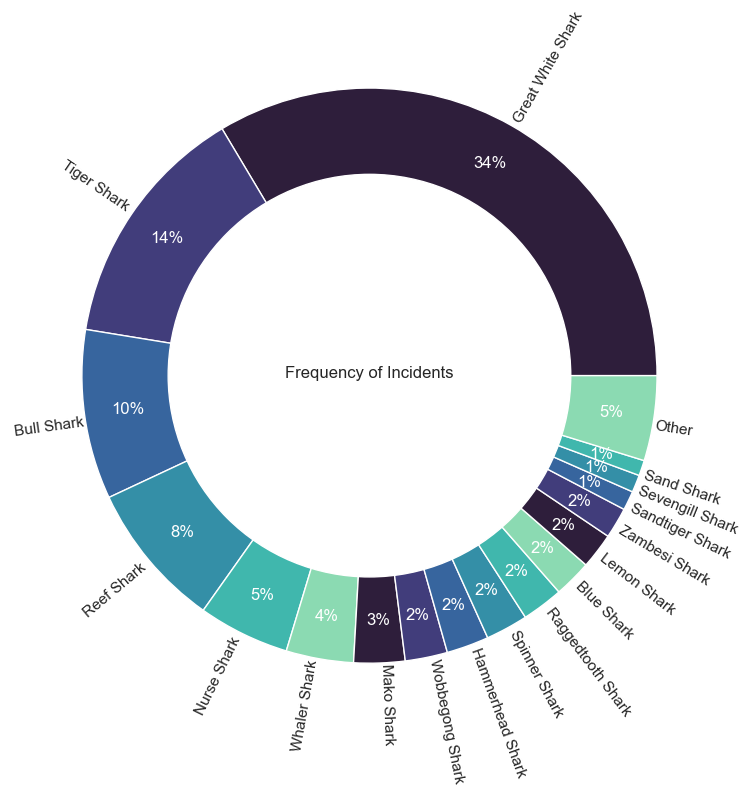

In [141]:
# Create Donut Plot for Frequencies 
Frequency_Table
fig, ax= plt.subplots(1)
plt.rcParams["figure.figsize"] = (8,8)

colors = sns.color_palette("mako")
plt.tight_layout()
patches, texts, autotexts= plt.pie(x= Frequency_Table['Frequency'], 
                                   labels = Frequency_Table.index, colors=colors, 
                                   rotatelabels= 0.25,
                                   autopct='%0.0f%%', 
                                   pctdistance=0.85,
                                   labeldistance=1)

[autotexts.set_color('white') for autotexts in autotexts]

ax1.axis('equal')
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Frequency of Incidents', pad=-260)

plt.savefig('DonutChart.png',bbox_inches="tight")